In [2]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
client = Client()

# 1. Get Per-Footprint Info

In [30]:
filename = os.path.join(KL_data_dir, "results/method_validation/footprints/KL_freq_bin_9_pseudocount_0_chrom_{chrom}.tsv")

ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()
df = df.drop("Unnamed: 0", axis = 1)

filename = os.path.join(KL_data_dir, "results/method_validation/footprints/KL_freq_bin_2_pseudocount_0_chrom_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df_2 = ddf.compute()
df_2 = df_2.drop("Unnamed: 0", axis = 1)

df_merged = df.merge(df_2, on = "region", how = "inner", suffixes = ("_bin_9", "_bin_2"))

In [31]:
filename = os.path.join(KL_data_dir, "results/method_validation/footprints/pergene/mu_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()

df_merged = df_merged.merge(df, on = "region", how = "inner")

filename = os.path.join(KL_data_dir, "results/method_validation/footprints/pergene/zoonomia_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()

df_merged = df_merged.merge(df, on = "region", how = "inner")

filename = os.path.join(KL_data_dir, "results/method_validation/footprints/pergene/denovo_{chrom}.tsv")
ddf = dd.read_csv([filename.format(chrom = chrom) for chrom in all_chrom_set], sep = "\t")
df = ddf.compute()

df_merged = df_merged.merge(df, on = "region", how = "inner")

# 2. Check for Footprints with many sites. Is there an error I should fix?

Tried checking if this is an issue. It is not an issue, and there are certain footprints that are naturally long

In [50]:
df_merged.sort_values("sites", ascending = False)

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff
466980,2.902408.4,0.005733,0.000000,5.544742e-06,106,723,144,27,3,0
1324993,5.258278.4,0.011722,0.000000,5.720134e-06,120,687,90,6,0,0
2310578,10.306366.5,0.034295,0.000926,5.577932e-06,99,677,70,0,0,0
1288970,5.664212.7,0.020161,0.008031,5.675575e-06,94,669,324,117,45,15
2889987,14.349358.7,0.012486,0.000000,3.758037e-06,90,638,66,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3267221,17.831718.1,0.330501,0.000000,1.766100e-08,1,1,0,0,0,0
466770,2.8696562.9,0.613284,0.613266,4.161500e-09,0,1,1,0,0,0
2132327,9.965788.2,0.613284,0.613266,4.161500e-09,0,1,0,0,0,0
2010752,8.852661.1,0.330530,0.000000,5.075000e-08,1,1,0,0,0,0


In [17]:
footprint_filename = os.path.join(KL_data_dir, "footprints/consensus_footprints_and_collapsed_motifs_hg38.bed.gz")
fp_header = ['Chrom', 'start', 'end', 'identifier', 'mean_signal', 'num_samples', 'num_fps', 'width', 'summit_pos', 'core_start', 'core_end', 'motif_clusters']
fp = pd.read_csv(footprint_filename, sep = "\t", names = fp_header)

## check 2.902408.4

In [8]:
chrom = 2
filename = os.path.join(KL_data_dir, f"results/method_validation/footprints/{chrom}.tsv")

df_sites = dd.read_csv(filename, sep = "\t", dtype={'Spliceai_info': 'object', 'DHS_tissue': 'object', 'footprint_motif_clusters': 'object'})

In [12]:
df_footprint = df_sites[df_sites["region"] == "2.902408.4"].compute()

df_footprint.sort_values("Pos", ascending = True, inplace = True)

In [19]:
fp[fp["identifier"] == "2.902408.4"]

,Chrom,start,end,identifier,mean_signal,num_samples,num_fps,width,summit_pos,core_start,core_end,motif_clusters
2349296,chr2,215958276,215958543,2.902408.4,142.770634,10,50,267,215958419,215958283.0,215958541.0,AP1/1;AP1/2;CCAAT/CEBP;CREB/ATF/2;CREB/ATF/3;D...


It is actually a very long footprint

## check 5.258278.4

In [21]:
identifier = "5.258278.4"

In [20]:
chrom = 5
filename = os.path.join(KL_data_dir, f"results/method_validation/footprints/{chrom}.tsv")

df_sites = dd.read_csv(filename, sep = "\t", dtype={'Spliceai_info': 'object', 'DHS_tissue': 'object', 'footprint_motif_clusters': 'object'})

In [22]:
fp[fp["identifier"] == identifier]

,Chrom,start,end,identifier,mean_signal,num_samples,num_fps,width,summit_pos,core_start,core_end,motif_clusters
3212954,chr5,31913530,31913759,5.258278.4,172.431685,21,57,229,31913661,31913532.0,31913766.0,AP1/1;AP1/2;E2F/2;ETS/2;FOX/4;GLI;HD/18;HD/24;...


# 3. filter by number of sites and total mutation rate

<AxesSubplot:xlabel='sites', ylabel='Count'>

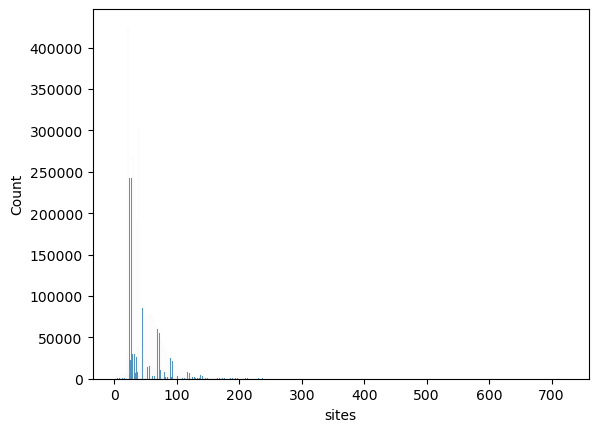

In [24]:
sns.histplot(data=df_merged, x="sites")

[None]

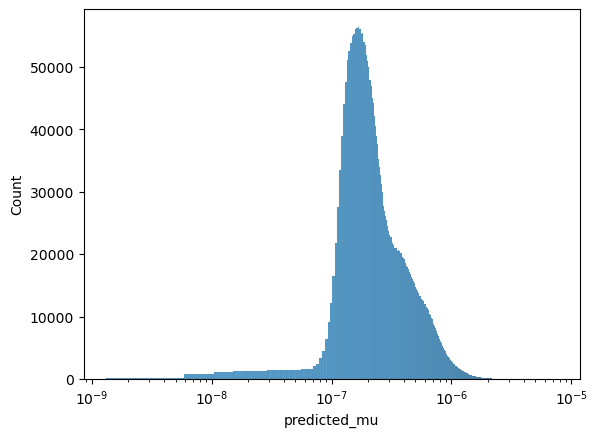

In [5]:
g = sns.histplot(data=df_merged, x="predicted_mu")
g.set(xscale = 'log')

<AxesSubplot:xlabel='predicted_mu', ylabel='Count'>

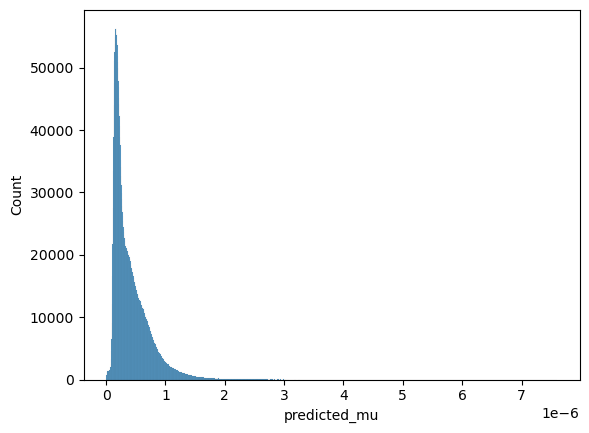

In [25]:
sns.histplot(data=df_merged, x="predicted_mu")

In [37]:
## do number of sites by 20, this keeps most sites anyways

In [32]:
## do sites cutoff
cutoff = 20

print(len(df_merged))
print(len(df_merged[df_merged["sites"] > cutoff]))
print(df_merged["sites"].mean())

df_merged_cutoff = df_merged[df_merged["sites"] > cutoff]

3759129
3676565
47.06491530351845


In [46]:
## do sites cutoff
mu_cutoff = 2e-07

print(len(df_merged_cutoff))
print(len(df_merged_cutoff[df_merged_cutoff["predicted_mu"] > mu_cutoff]))
print(df_merged_cutoff["predicted_mu"].mean())

df_merged_cutoff = df_merged_cutoff[df_merged_cutoff["predicted_mu"] > mu_cutoff]
df_merged_cutoff_strict = df_merged_cutoff[df_merged_cutoff["predicted_mu"] > 4e-07]

2666609
2666609
5.137211985652938e-07


In [12]:
df_merged_cutoff.sort_values("max_likelihood_KL_bin_9", ascending = True)

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,denovo_an_control
3262659,17.11481.74,1.847578e-16,0.000000,2.584190e-07,9,36,3,0,0,0,0.0
1150512,5.261518.7,1.847578e-16,0.000000,1.000384e-06,16,99,0,0,0,0,0.0
2311727,10.5218948.1,1.847578e-16,0.000000,4.680165e-07,17,69,9,3,0,0,0.0
3521785,19.21475.2,1.847578e-16,0.000000,4.545170e-07,12,66,3,0,0,0,0.0
2311745,10.5234.7,1.847578e-16,0.000000,1.804670e-06,34,201,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
283691,1.9264462.1,6.139510e-01,0.613952,5.489120e-07,0,39,0,0,0,0,0.0
2360518,10.299736.4,6.139510e-01,0.613950,4.137140e-07,0,63,3,0,0,0,0.0
927004,3.7118509.7,6.139513e-01,0.613949,4.375665e-07,0,66,3,0,0,0,0.0
3092963,15.444345.7,6.139513e-01,0.613954,1.220944e-06,0,26,3,0,0,0,0.0


In [13]:
## check that top KL bins actually have similar mean mu as rest of the pile. This seems good!

In [14]:
df_merged_cutoff[np.isclose(df_merged_cutoff["max_likelihood_KL_bin_9"], 6.139555e-01, atol = 0.01)]["predicted_mu"].mean()

2.368685789473684e-07

In [15]:
df_merged_cutoff

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,denovo_an_control
0,1.1032638.1,0.233154,0.044739,2.922185e-07,4,35,3,0,0,0,0.0
1,1.103321.1,0.015232,0.002546,7.320180e-07,14,69,36,18,6,0,0.0
2,1.1033676.7,0.048994,0.000095,7.573930e-07,9,33,3,0,0,0,0.0
5,1.1036526.5,0.028200,0.000000,4.701480e-07,12,50,47,41,29,11,0.0
7,1.1039781.7,0.059874,0.000000,2.646105e-07,7,51,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3759123,22.997499.7,0.223955,0.223279,5.584530e-07,3,37,9,0,0,0,0.0
3759124,22.997564.1,0.012045,0.000000,5.801740e-07,7,30,0,0,0,0,0.0
3759126,22.997717.2,0.038943,0.030991,3.316005e-07,5,48,27,3,0,0,0.0
3759127,22.997757.1,0.010130,0.000000,3.731140e-07,9,53,0,0,0,0,0.0


# 4. Validate on Zoonomia Values

In [34]:
zoonomia_columns = [f"phyloP_{value}_cutoff" for value in range(1, 9, 2)]

In [35]:
zoonomia_columns

['phyloP_1_cutoff', 'phyloP_3_cutoff', 'phyloP_5_cutoff', 'phyloP_7_cutoff']

In [36]:
df_merged_cutoff.sort_values("max_likelihood_KL_bin_9", ascending = False, inplace = True)

In [37]:
df_merged_cutoff[zoonomia_columns].sum()/df_merged_cutoff["sites"].sum()

phyloP_1_cutoff    0.218494
phyloP_3_cutoff    0.068157
phyloP_5_cutoff    0.027879
phyloP_7_cutoff    0.009519
dtype: float64

In [38]:
for x in zoonomia_columns:
    df_merged_cutoff[x + "_fraction"] = df_merged_cutoff[x]/df_merged_cutoff["sites"]

In [39]:
len(df_merged_cutoff[df_merged_cutoff["max_likelihood_KL_bin_2"] > 1e-2])/len(df_merged_cutoff)

0.30599799220658147

## check for top KL value

In [22]:
df_merged_cutoff_top = df_merged_cutoff[np.isclose(df_merged_cutoff["max_likelihood_KL_bin_9"], 6.139555e-01, atol = 0.01)]

len(df_merged_cutoff_top)

2755

In [23]:
print(df_merged_cutoff_top["sites"].sum())

df_merged_cutoff_top[zoonomia_columns].sum()/df_merged_cutoff_top["sites"].sum()

96366


phyloP_1_cutoff    0.214910
phyloP_3_cutoff    0.062128
phyloP_5_cutoff    0.026171
phyloP_7_cutoff    0.008084
dtype: float64

In [24]:
df_merged_cutoff_top[df_merged_cutoff_top["phyloP_7_cutoff"] > 0]

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,denovo_an_control,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction
1810302,7.840436.5,0.613955,0.613955,1.649273e-06,0,66,39,39,15,6,0.0,0.590909,0.590909,0.227273,0.090909
2449597,11.516723.7,0.613950,0.613947,3.188115e-07,0,35,27,6,3,3,0.0,0.771429,0.171429,0.085714,0.085714
3710202,22.621676.3,0.613950,0.613947,3.719975e-07,0,33,24,18,6,6,0.0,0.727273,0.545455,0.181818,0.181818
3116084,16.85545.7,0.613949,0.613948,4.093495e-07,0,43,21,9,3,3,0.0,0.488372,0.209302,0.069767,0.069767
2589382,12.6154922.3,0.613949,0.613946,2.849105e-07,0,26,21,15,9,3,0.0,0.807692,0.576923,0.346154,0.115385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74919,1.873672.4,0.613940,0.613938,2.053345e-07,0,30,21,12,9,6,0.0,0.700000,0.400000,0.300000,0.200000
278788,1.1851438.6,0.613940,0.613937,2.035075e-07,0,30,27,12,9,6,0.0,0.900000,0.400000,0.300000,0.200000
1462798,6.302135.7,0.613940,0.613937,2.056390e-07,0,30,24,24,12,3,0.0,0.800000,0.800000,0.400000,0.100000
3011803,15.721219.2,0.613940,0.613937,2.027970e-07,0,33,33,33,27,12,0.0,1.000000,1.000000,0.818182,0.363636


## check for top N value

In [25]:
n = 10000
df_merged_cutoff_top = df_merged_cutoff.iloc[0:n]

print(df_merged_cutoff_top["sites"].sum())

df_merged_cutoff_top[zoonomia_columns].sum()/df_merged_cutoff_top["sites"].sum()

352045


phyloP_1_cutoff    0.214055
phyloP_3_cutoff    0.064620
phyloP_5_cutoff    0.027920
phyloP_7_cutoff    0.009672
dtype: float64

doesn't seem to work?

## Maybe find footprints with high proportion of zoonomia values?

In [65]:
df_merged_cutoff_highphyloP = df_merged_cutoff[df_merged_cutoff["phyloP_7_cutoff_fraction"] > 0.5]

In [66]:
df_merged_cutoff_highphyloP["sites"].sum()

108987

In [67]:
df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9_log"] = np.log10(df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9"])
df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2_log"] = np.log10(df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2"])

/tmp/ipykernel_5481/3392916132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9_log"] = np.log10(df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9"])
/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_5481/3392916132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cutoff_hig

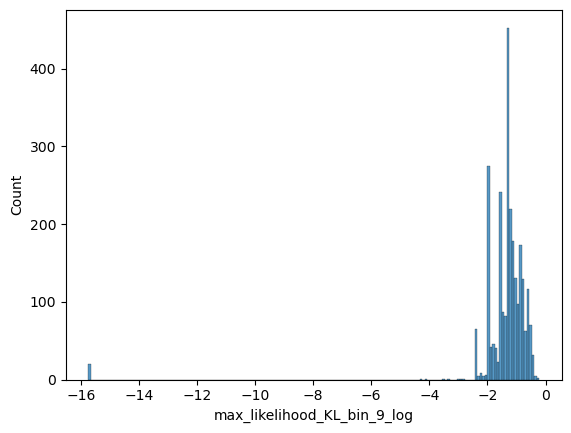

In [68]:
g = sns.histplot(data=df_merged_cutoff_highphyloP, x="max_likelihood_KL_bin_9_log")
# g.set(xscale='log')


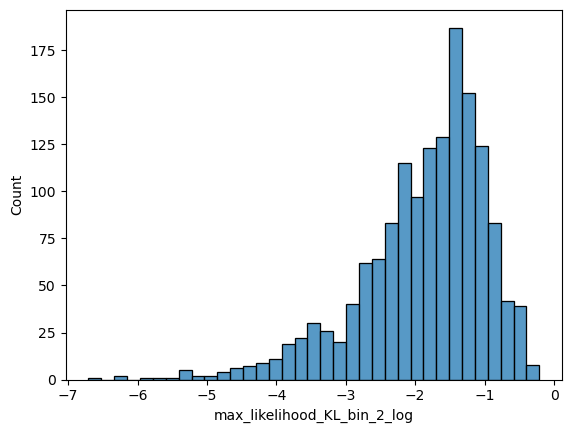

In [69]:
g = sns.histplot(data=df_merged_cutoff_highphyloP, x="max_likelihood_KL_bin_2_log")
# g.set(xscale='log')


In [72]:
df_merged_cutoff_highphyloP[df_merged_cutoff_highphyloP["max_likelihood_KL_bin_9"] < 2e-15]

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,denovo_an_case,denovo_an_control,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction,expected_denovo_mu,max_likelihood_KL_bin_9_log,max_likelihood_KL_bin_2_log
2054171,9.7948789.4,1.847578e-16,0.0,2.664375e-07,11,45,45,45,42,24,0.0,0.0,1.000000,1.000000,0.933333,0.533333,0.000507,-15.733397,-inf
1417503,6.339383.4,1.847578e-16,0.0,3.744335e-07,9,33,33,27,24,18,0.0,0.0,1.000000,0.818182,0.727273,0.545455,0.000712,-15.733397,-inf
2147094,9.324808.4,1.847578e-16,0.0,1.098839e-06,15,57,51,51,45,33,0.0,0.0,0.894737,0.894737,0.789474,0.578947,0.002090,-15.733397,-inf
2447906,11.207295.4,1.847578e-16,0.0,3.742305e-07,13,53,50,47,35,29,0.0,0.0,0.943396,0.886792,0.660377,0.547170,0.000712,-15.733397,-inf
3100052,15.498826.5,1.847578e-16,0.0,6.260520e-07,40,68,68,68,60,36,0.0,0.0,1.000000,1.000000,0.882353,0.529412,0.001191,-15.733397,-inf
3321513,17.61763.2,1.847578e-16,0.0,8.028650e-07,26,75,72,69,61,40,0.0,0.0,0.960000,0.920000,0.813333,0.533333,0.001527,-15.733397,-inf
1961340,8.2614834.1,1.847578e-16,0.0,5.485060e-07,16,54,54,45,39,30,0.0,0.0,1.000000,0.833333,0.722222,0.555556,0.001043,-15.733397,-inf
356873,2.5486453.4,1.847578e-16,0.0,3.633700e-07,9,45,45,42,39,24,0.0,0.0,1.000000,0.933333,0.866667,0.533333,0.000691,-15.733397,-inf
2434074,11.933857.5,1.847578e-16,0.0,2.969890e-07,10,39,39,36,33,24,0.0,0.0,1.000000,0.923077,0.846154,0.615385,0.000565,-15.733397,-inf
2172241,9.248274.4,1.847578e-16,0.0,3.922975e-07,12,45,42,42,39,27,0.0,0.0,0.933333,0.933333,0.866667,0.600000,0.000746,-15.733397,-inf


In [73]:
df_merged_cutoff_highphyloP[df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2"] == 0.0]

,region,max_likelihood_KL_bin_9,max_likelihood_KL_bin_2,predicted_mu,polymorphic,sites,phyloP_1_cutoff,phyloP_3_cutoff,phyloP_5_cutoff,phyloP_7_cutoff,denovo_an_case,denovo_an_control,phyloP_1_cutoff_fraction,phyloP_3_cutoff_fraction,phyloP_5_cutoff_fraction,phyloP_7_cutoff_fraction,expected_denovo_mu,max_likelihood_KL_bin_9_log,max_likelihood_KL_bin_2_log
298483,1.2605429.3,3.305764e-01,0.0,2.360890e-07,7,39,36,36,30,21,0.0,0.0,0.923077,0.923077,0.769231,0.538462,0.000449,-0.480728,-inf
574117,2.703142.7,3.305741e-01,0.0,2.116275e-07,5,36,36,33,30,21,0.0,0.0,1.000000,0.916667,0.833333,0.583333,0.000403,-0.480731,-inf
1559368,6.210355.4,3.305738e-01,0.0,2.090900e-07,5,39,39,27,24,21,0.0,0.0,1.000000,0.692308,0.615385,0.538462,0.000398,-0.480732,-inf
412753,2.315068.7,3.305729e-01,0.0,2.015790e-07,5,33,33,30,30,18,0.0,0.0,1.000000,0.909091,0.909091,0.545455,0.000383,-0.480733,-inf
2654019,12.8662621.5,2.315426e-01,0.0,3.048045e-07,7,33,33,33,33,21,0.0,0.0,1.000000,1.000000,1.000000,0.636364,0.000580,-0.635369,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931905,8.717865.1,1.847578e-16,0.0,3.579905e-07,10,60,60,60,57,33,0.0,0.0,1.000000,1.000000,0.950000,0.550000,0.000681,-15.733397,-inf
890374,3.870534.4,1.847578e-16,0.0,7.437920e-07,59,76,76,76,67,42,0.0,0.0,1.000000,1.000000,0.881579,0.552632,0.001415,-15.733397,-inf
3250855,17.18887.7,1.847578e-16,0.0,9.779525e-07,55,99,90,90,87,60,0.0,0.0,0.909091,0.909091,0.878788,0.606061,0.001860,-15.733397,-inf
351991,2.756059.4,1.847578e-16,0.0,4.139170e-07,10,44,38,26,26,23,0.0,0.0,0.863636,0.590909,0.590909,0.522727,0.000787,-15.733397,-inf


In [70]:
len(df_merged_cutoff_highphyloP[df_merged_cutoff_highphyloP["max_likelihood_KL_bin_2"] == 0.0])

1104

# 5. Look into de novo mutations

Too little power to find anything for de novo mutations

In [43]:
df_merged_cutoff[["denovo_an_case", "denovo_an_control"]].sum()

denovo_an_case       3005.0
denovo_an_control    2885.0
dtype: float64

In [44]:
df_merged_cutoff["expected_denovo_mu"] = df_merged_cutoff["predicted_mu"] * 1902

In [61]:
df_top = df_merged_cutoff.iloc[0:10000]
(df_top[["denovo_an_case", "denovo_an_control"]].sum(), df_top["expected_denovo_mu"].sum())

(denovo_an_case       9.0
 denovo_an_control    9.0
 dtype: float64,
 6.546099619059)

In [64]:
df_top = df_merged_cutoff_strict.iloc[0:10000]
(df_top[["denovo_an_case", "denovo_an_control"]].sum(), df_top["expected_denovo_mu"].sum())

(denovo_an_case        9.0
 denovo_an_control    11.0
 dtype: float64,
 11.189041064669999)